In [1]:
import pickle
from transformers import AutoModel

/Users/garylai/Dev/subset-active-learning/.venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# my_model = AutoModel.from_pretrained("/Users/garylai/Dev/subset-active-learning/results/checkpoints/random_sampling_4000_1500")

In [3]:
def get_test_accs(strategy, sampling_sizes, steps: str):
    test_set_results = []
    for training_size in sampling_sizes: 
        with open(f"./results/{strategy}_test/{steps}_steps_corrected/test_set_evaluation_{training_size}.pkl", "rb") as f:
            test_set_result = pickle.load(f)
            test_set_results.append(test_set_result)

    get_accs = lambda x: x.metrics["test_accuracy"]
    test_accs = list(map(get_accs, test_set_results))
    return test_accs

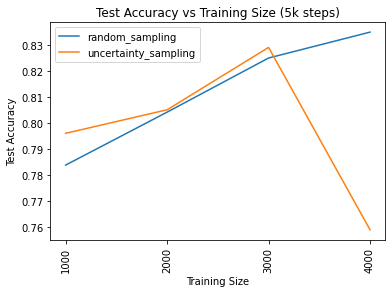

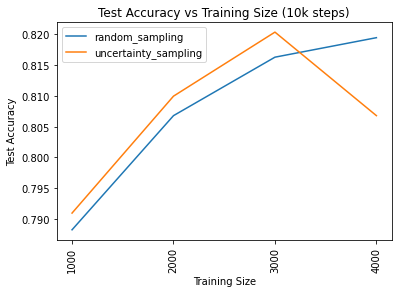

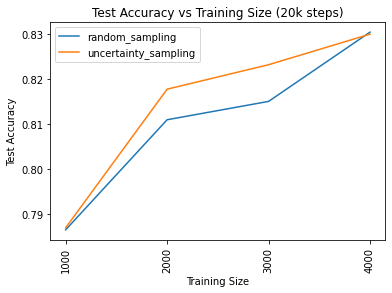

In [5]:
# plot two curves on the same figure
import matplotlib.pyplot as plt

for steps in ("5k", "10k", "20k"):
    random_resampling_results = get_test_accs("random_sampling", (1000, 2000, 3000, 4000), steps)
    uncertainty_sampling_results = get_test_accs("uncertainty_sampling", (1000, 2000, 3000, 4000), steps)

    plt.plot(random_resampling_results)
    plt.plot(uncertainty_sampling_results)
    plt.legend(["random_sampling", "uncertainty_sampling"])

    x = range(len(random_resampling_results))
    assert len(uncertainty_sampling_results) == len(random_resampling_results)
    plt.xticks(x, [(i+1)*1000 for i in x], rotation='vertical')

    plt.xlabel("Training Size")
    plt.ylabel("Test Accuracy")
    plt.title(f"Test Accuracy vs Training Size ({steps} steps)")
    plt.show()
    plt.show()